In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('dataset_3.csv')
df.rename( columns=  {
    'Hours_Studied' : 'study',
    'Attendance_Rate' : 'attendance',
    'Sleep_Hours' : 'sleep',
    'Practice_Tests_Taken': 'tests',
    'Exam_Score' : 'score'
}, inplace=True)
df.head()

,study,attendance,sleep,tests,score
0,59.571811,9.603615,22.040853,58.921043,244.180306
1,73.733304,36.283481,30.727455,86.303344,276.904776
2,36.181427,39.246835,27.387595,55.253250,96.006786
3,55.974484,48.604918,17.019534,77.706794,150.720884
4,90.365226,42.548571,56.761125,67.016317,331.098607


In [4]:
x = df[['study', 'attendance', 'sleep', 'tests']].values.reshape(-1,4)
y = df['score'].values.reshape(-1,1)

sc = MinMaxScaler()
x_norm = sc.fit_transform(x)
jb.dump(sc, 'scaler_3.pkl')
yn = y.min()
yx = y.max()
y = (y-yn)/(yx - yn)

In [5]:
def score(study, attendance, sleep, tests) :
    model_path = 'three.keras'
    sc = jb.load('scaler_3.pkl')
    inp = np.array([[study, attendance, sleep, tests]])
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(4,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y, epochs=500)
        lv = hist.history['loss']
        pred = model.predict(x)
        model.save('three.keras')
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.title('Actual vs Predicted')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx-yn)+yn

c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1068
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0578
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0386
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0300
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0269
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0263
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0254
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0221
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0191
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0155
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0134
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0114
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0090
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0095
Epoch 16/500
4/4 ━━

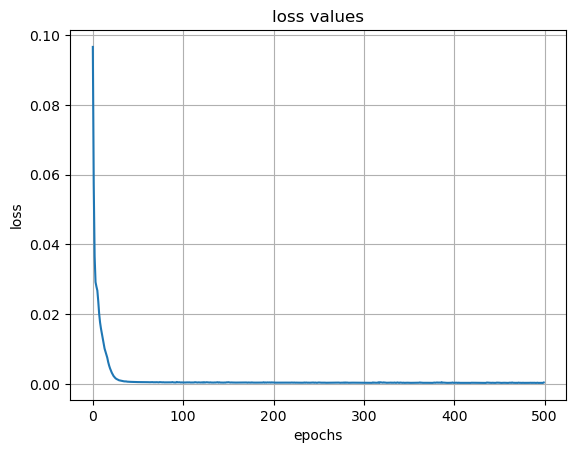

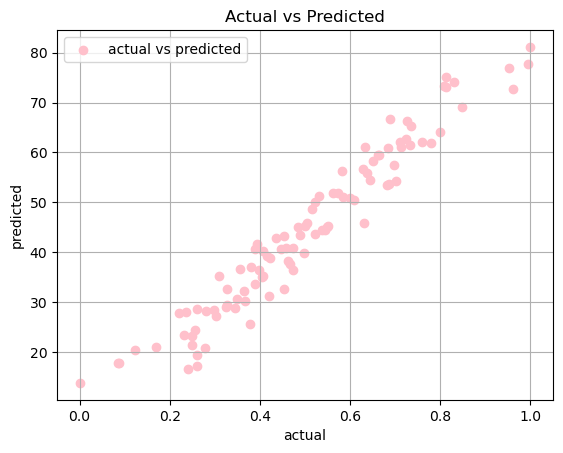

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
325.122277797891
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
146.130870604726
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
257.15587532082793


In [7]:
print(score(95.69, 47.43, 36.41, 91.74))
print(score(17.85, 7.69, 49.91, 59.21))
print(score(72.23, 42.42, 40.95, 78.73))